# Phase 1 - Milestone 1

## Introduction

`Nama: Fadhil Reza Maulana`

`Batch: 007`

## Description

    Dataset ini berisi tentang data-data client pada suatu bank. Pihak bank akan melakukan marketing campaign dengan menghubungi client mereka melalui phone call.
    

### Objective

    Menentukan model supervised learning apa yang paling tepat dalam memprediksi target pada data set ini.

    Memprediksi apakah client akan berlangganan deposito jangka panjang (variable y) ? (Yes/No).
    
### Problem Statement

    Dataset masih 'kotor', dalam artian masih perlu dilakukan proses EDA dan Preprocessing lebih lanjut untuk menghasilkan prediksi sebaik mungkin. Kemudian setelah memilih model untuk di jadikan sebagai 'base model', dilakukan hyperparameter tuning untuk menghasilkan model yang lebih baik lagi.

## Working Area

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Exploratory Data Analysis (EDA)

**Melakukan pengecdekan apakah ada baris yang terduplikasi atau tidak**

In [3]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


Keterangan:

* Terdapat 12 baris duplikasi

**Remove baris duplikasi**

In [4]:
df = df[~df.duplicated()]
df.shape

(41176, 21)

**Melakukan pengecekan informasi dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

Keteragan:

* Distribusi tipe data tiap variabel:
    * 11 variabel dengan tipe data categorical
    * 10 variabel dengan tipe data numerical
* Tidak ada missing value pada dataset


**Cek Distribusi Data Tiap Variabel**

In [6]:
num_data = df.select_dtypes(exclude=['object'])

In [7]:
num_data_dist = (num_data.mean() > df.median()) | (num_data.mean() < df.median())
num_data_dist

age               True
duration          True
campaign          True
pdays             True
previous          True
emp.var.rate      True
cons.price.idx    True
cons.conf.idx     True
euribor3m         True
nr.employed       True
dtype: bool

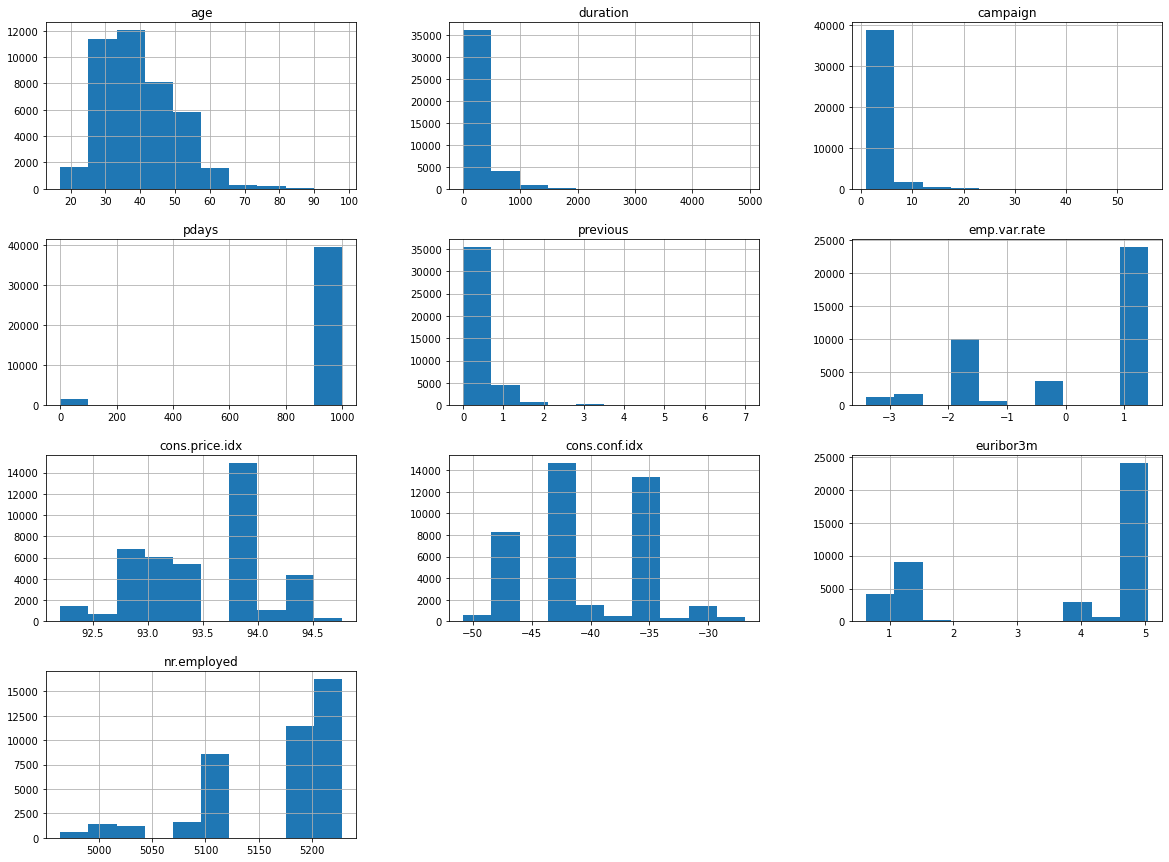

In [8]:
num_data.hist(figsize=(20,15))
plt.show()

Keterangan:

* Grafik di atas menunjukan bagaimana pendistribusi data setiap variable
* Distribusi data dari dataset ini terlihat cenderung tidak terdistribusi secara normal

**Plot hubungan variables calon fitur dengan target (variable y)**

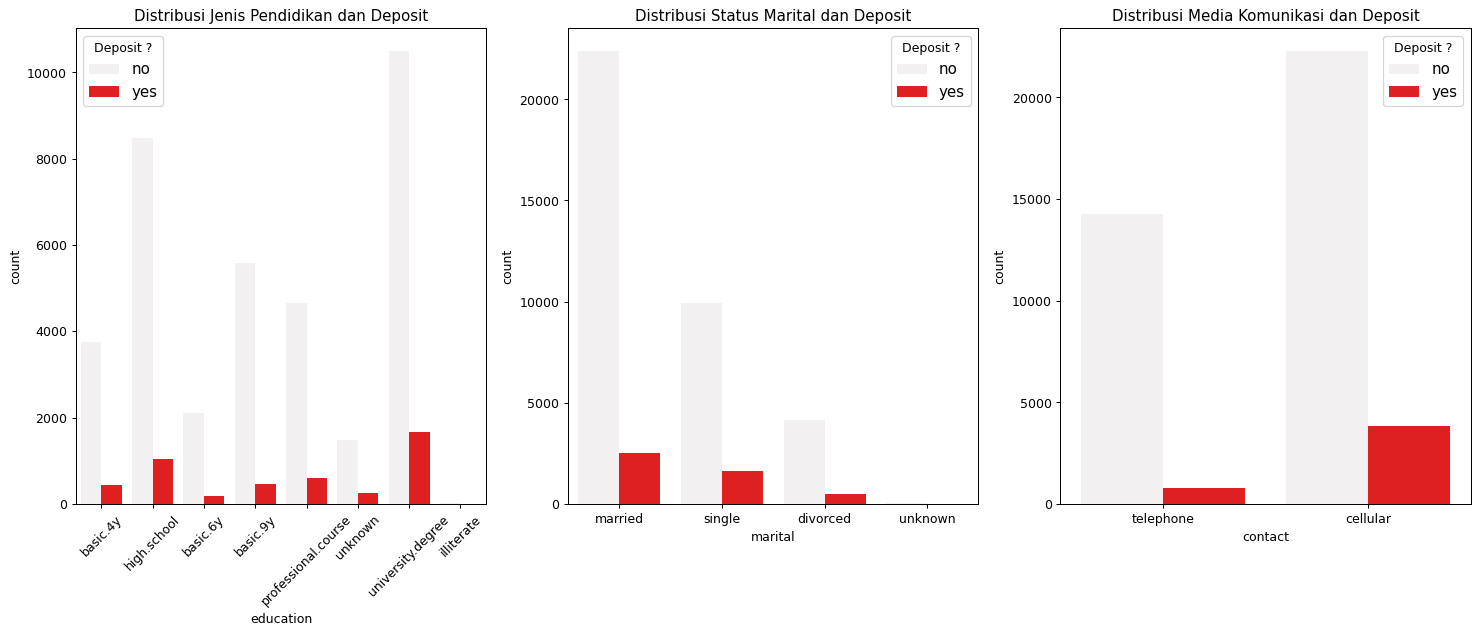

In [9]:
fig, ax = plt.subplots(1, 3, figsize =(20,7), dpi=90)
sns.countplot(x = 'education', hue= 'y', data = df, color = 'red', ax=ax[0])
sns.countplot(x = 'marital',hue= 'y', data = df, color = 'red', ax=ax[1])
sns.countplot(x = 'contact',hue= 'y', data = df, color = 'red', ax=ax[2])

ax[0].tick_params(axis='x', rotation=45)

ax[0].title.set_text('Distribusi Jenis Pendidikan dan Deposit')
ax[1].title.set_text('Distribusi Status Marital dan Deposit')
ax[2].title.set_text('Distribusi Media Komunikasi dan Deposit')

ax[0].legend(title = 'Deposit ?', fontsize=12)
ax[1].legend(title = 'Deposit ?', fontsize=12)
ax[2].legend(title = 'Deposit ?', fontsize=12)

plt.show()


Keterangan:

Di atas merupakan suatu bar plot yang menghubungkan antara fitur dengan target, dengan penjelasan:

* Dari grafik distribusi jenis pendidikan. Client dengan lulusan universitas, menjadi client yang menerima tawaran deposito tertinggi, disusul lulusan SMA
* Dari grafik distribusi status pernikahan. Client yang sudah berumah tangga menjadi client yang menerima tawaran deposito tertinggi, disusul client yang masih melajang
* Dari grafik media komunikasi. Client yang di kontak melalui handphone atau perangkat seluler lain lebih berpotensi menerima tawaran deposito

## Preprocessing

### Pemeriksaan Value di Variable Kolom

In [10]:
cat_data = df.select_dtypes(include = 'object')
cat_data

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [11]:
for column in cat_data:
    print((cat_data[column] == 'unknown').value_counts())

False    40846
True       330
Name: job, dtype: int64
False    41096
True        80
Name: marital, dtype: int64
False    39446
True      1730
Name: education, dtype: int64
False    32580
True      8596
Name: default, dtype: int64
False    40186
True       990
Name: housing, dtype: int64
False    40186
True       990
Name: loan, dtype: int64
False    41176
Name: contact, dtype: int64
False    41176
Name: month, dtype: int64
False    41176
Name: day_of_week, dtype: int64
False    41176
Name: poutcome, dtype: int64
False    41176
Name: y, dtype: int64


Keterangan:

* Disini saya memeriksa apakah ada value yang janggal dari setiap kolom categorical.
* Ternyata dari beberapa variable categorical didalamnya mengandung value 'unknown' yang tidak jelas masuk ke dalam kategori apa.
* Oleh karena itu saya akan mendefinisikan value 'unknown' itu sebagai missing value

In [12]:
df_new = df.replace('unknown', np.NaN)
df_new.isnull().sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Keterangan:

* Sekarang value 'unknown' sudah menjadi suatu missing value
* Varibles yang menjadi memiliki missing value adalah job, marital, education, default, housing dan loan

### Splitting Dataset

**Membagi kolom dataset berdasarkan fitur dan target**

In [13]:
X = df_new.drop(columns = 'y', axis = 1)
y = df_new['y']

Keterangan:
* Variabel X = berisikan fitur-fitur
* Variabel Y = berisikan target

**Train test split**

In [14]:
X_train,X_test,y_train,y_test = train_test_split (X, y, test_size =0.3, random_state = 0)
X.shape, X_train.shape, X_test.shape

((41176, 20), (28823, 20), (12353, 20))

### Handling Outliers Data Train

<AxesSubplot:>

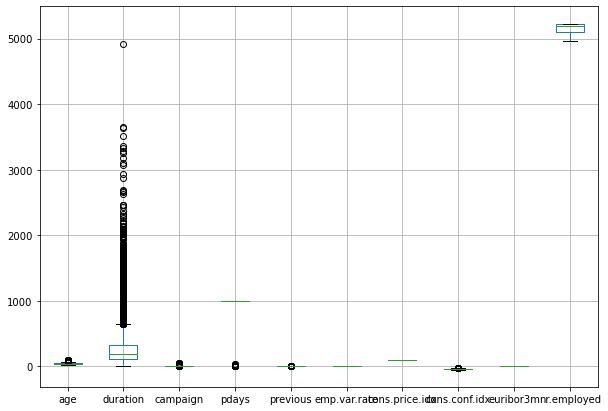

In [15]:
plt.figure(figsize = (10,7))
X_train.boxplot()

In [16]:
X_train.pdays.value_counts()

999    27743
3        306
6        293
4         83
9         56
12        46
2         46
7         45
5         31
10        29
13        27
11        22
14        18
15        17
1         16
8         10
16         9
0          7
18         7
17         4
22         3
21         2
26         1
27         1
20         1
Name: pdays, dtype: int64

Keterangan:

* Terlihat secara visual bahwa variable duration dan pdays memiliki outliers
* Tapi outliers pada fitur 'pdays' dengan value 999 menunjukan customer-customer yang belum pernah di kontak sebelummnya untuk di berikan tawaran oleh pihak bank

* Jadi untuk sementara handling outliers akan dilakukan untuk fitur 'duration' saja dengan metode capping. Hal ini dilakukan untuk mencegah adanya value yang hilang dikarenakan proporsi valuenya tidak merata, jadi outliers akan di skalakan

In [17]:
df.pdays.value_counts().sum()

41176

In [18]:
capping = Winsorizer(capping_method='iqr',
                          tail='both', 
                          fold=1.5,
                          variables=['duration','age','campaign'])
capping.fit(X_train)
X_train_clean = capping.transform(X_train)

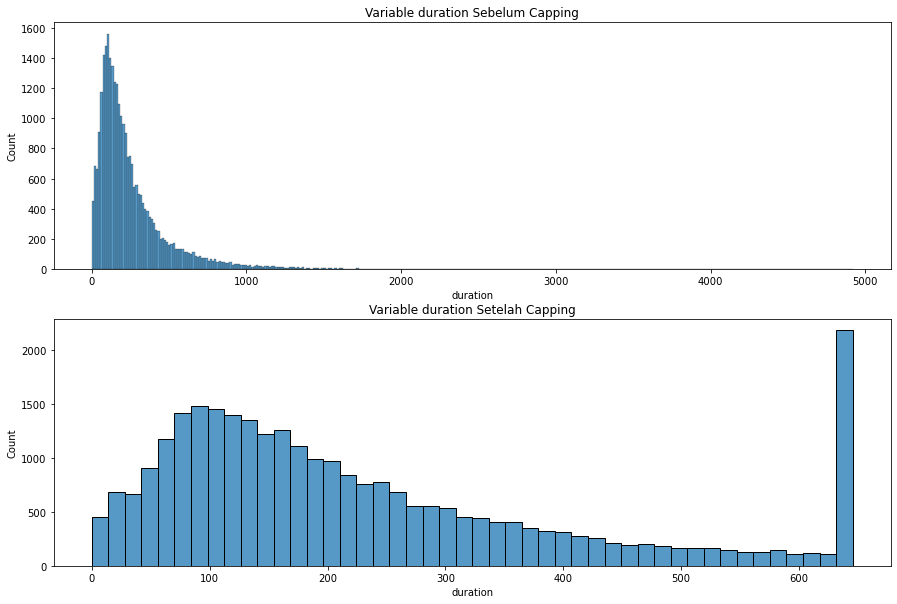

In [19]:
fig, ax = plt.subplots(2,figsize=(15,10))
sns.histplot(X_train['duration'], ax= ax[0])
ax[0].set_title('Variable duration Sebelum Capping')
sns.histplot(X_train_clean['duration'], ax= ax[1])
ax[1].set_title('Variable duration Setelah Capping')

plt.show()

Keterangan:

* Dari proses handling outliers, terlihat variable duration distribusinya menjadi lebih terlihat
* Tapi untuk pdays sebelum capping memang proporsinya sangat tidak merata, hal ini dapat membuat model nantinya bias. Jadi kemungkinan besar akan saya lakukan drop untuk variabel pdays ini

### Handling Missing Value

Sekarang beberapa variabel di dataset memiliki missing value, dan diperlukan suatu action dalam menghandle missing value tersebut

Melihat persentase Missing Value di setiap variable fitur

In [20]:
X_train_clean.isnull().sum()/len(X_train_clean)*100

age                0.000000
job                0.770218
marital            0.187350
education          4.198036
default           20.889567
housing            2.425147
loan               2.425147
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
dtype: float64

In [21]:
X_test.isnull().sum()/len(X_test)*100

age                0.000000
job                0.874282
marital            0.210475
education          4.209504
default           20.845139
housing            2.355703
loan               2.355703
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
dtype: float64

Keterangan:

* Persentase missing value dari tiap variabel cenderung sangat kecil
* Khusus variabel default baik di data train dan test memiliki persentase missing value paling besar yaitu > 20 %

Berhubung variables fitur yang memiliki Missing Value adalah bertipe categorical. Maka Missing Value akan di fill dengan mode (nilai terbanyak dari setiap variable)

In [22]:
for var in [X_train_clean,X_test]:
    var['job'].fillna(X_train_clean['job'].mode()[0], inplace = True)
    var['marital'].fillna(X_train_clean['marital'].mode()[0], inplace = True)
    var['education'].fillna(X_train_clean['education'].mode()[0], inplace = True)
    var['default'].fillna(X_train_clean['default'].mode()[0], inplace = True)
    var['education'].fillna(X_train_clean['education'].mode()[0], inplace = True)
    var['housing'].fillna(X_train_clean['default'].mode()[0], inplace = True)
    var['loan'].fillna(X_train_clean['loan'].mode()[0], inplace = True)
    

Keterangan:

* Missing Value pada X_train di isi oleh nilai mode tiap variable pada kolom X_train
* Missing Value pada X_test di isi oleh nilai mode tiap variable pada kolom X_train

In [23]:
print('Jumlah Missing Value X_train: {}'.format(X_train_clean.isnull().sum().sum()))
print('Jumlah Missing Value X_test: {}'.format(X_test.isnull().sum().sum()))

Jumlah Missing Value X_train: 0
Jumlah Missing Value X_test: 0


### Encoding

In [24]:
X_train_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
27683,37.0,admin.,married,high.school,no,yes,no,telephone,dec,fri,12.0,1.0,999,0,nonexistent,-0.2,92.756,-45.9,3.563,5176.3
19155,30.0,admin.,single,university.degree,no,no,no,cellular,aug,tue,645.5,2.0,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1
33728,30.0,technician,single,high.school,no,yes,no,cellular,may,wed,9.0,6.0,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1
10384,48.0,blue-collar,married,basic.4y,no,yes,no,telephone,jun,mon,92.0,3.0,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1
23616,42.0,housemaid,married,university.degree,no,yes,yes,cellular,aug,thu,645.5,3.0,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1


Keterangan:

* Variable fitur **default, housing, loan dan contact** merupakan fitur categorical tipe binary.
* Variable fitur **job, marital, education, month, day_of_week dan poutcome** fitur fitur categorical tipe nominal dan ordinal

**Binary Encoding**

In [25]:
X_train_clean.pdays.value_counts()

999    27743
3        306
6        293
4         83
9         56
12        46
2         46
7         45
5         31
10        29
13        27
11        22
14        18
15        17
1         16
8         10
16         9
0          7
18         7
17         4
22         3
21         2
26         1
27         1
20         1
Name: pdays, dtype: int64

* Terkait fitur pdays ini menjelaskan lamanya hari sejak client mendapatkan tawaran terakhir dari pihak bank
* pdays dengan value 999 menandakan bahwa clients ini belum pernah mendapatkan tawaran dari bank. Karena jumlahnya lebih banyak di bandingkan clients yang sudah di berikan penawaran maka akan dilakukan suatu binary encoding khusus bagi fitur pdays,
    * Untuk value 999 akan di labeli dengan angka 0 (Belum pernah di hubungi)
    * Sisanya akan di labeli dengan angka 1 (Pernah di hubungi)

In [26]:
for var in [X_train_clean,X_test]:
    var['pdays_encode'] = np.where(var['pdays'] >= 999,0,1)

Keterangan:

* Pada varible fitur yaitu X_train_clean dan X_test akan di tambahkan kolom baru 'pdays_encode' yaitu kolom encode dari pdays
* Sekarang value dari kolom 'pdays' sudah berubah menjadi binary dengan value 1 dan 0 

In [27]:
print('Jumlah value 999 sebelum encode: {}'.format((X_train_clean['pdays'] == 999).count()))
print('Jumlah value 999 yang sudah di encode menjadi value 0 pada data train: {}'.format((X_train_clean['pdays_encode'] == 999).count()))
print('Jumlah value 999 yang sudah di encode menjadi value 0 pada data test: {}'.format((X_test['pdays_encode'] == 999).count()))

Jumlah value 999 sebelum encode: 28823
Jumlah value 999 yang sudah di encode menjadi value 0 pada data train: 28823
Jumlah value 999 yang sudah di encode menjadi value 0 pada data test: 12353


Kolom pdays sekarang di drop karena fungsinya sudah dialihkan kedalam kolom pdays_encode yang sudah di encode

In [28]:
for var in [X_train_clean,X_test]:
    var.drop(['pdays'], axis = 1, inplace = True)

Melakukan pengecekan value pada fitur tipe binary lainnya

In [29]:
print(X_train_clean.default.value_counts())
print(X_train_clean.housing.value_counts())
print(X_train_clean.loan.value_counts())
print(X_train_clean.contact.value_counts())

no     28821
yes        2
Name: default, dtype: int64
yes    15102
no     13721
Name: housing, dtype: int64
no     24407
yes     4416
Name: loan, dtype: int64
cellular     18250
telephone    10573
Name: contact, dtype: int64


Mengubah value fitur di X_train_clean dan X_test dengan tipe binary kedalam value 1 dan 0

In [30]:
for var in [X_train_clean,X_test]:
    var['default'] = np.where(var['default'] == 'yes',1,0)
    var['housing'] = np.where(var['housing'] == 'yes',1,0)
    var['loan'] = np.where(var['loan'] == 'yes',1,0)
    var['contact'] = np.where(var['contact'] == 'cellular',1,0)

**One Hot Encoding Untuk Fitur Lain**

Untuk fitur-fitur dengan tipe categorical lainnya, akan saya lakukan One Hot Encoding untuk semuanya

In [31]:
X_train_clean

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_encode
27683,37.0,admin.,married,high.school,0,1,0,0,dec,fri,12.0,1.0,0,nonexistent,-0.2,92.756,-45.9,3.563,5176.3,0
19155,30.0,admin.,single,university.degree,0,0,0,1,aug,tue,645.5,2.0,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,0
33728,30.0,technician,single,high.school,0,1,0,1,may,wed,9.0,6.0,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,0
10384,48.0,blue-collar,married,basic.4y,0,1,0,0,jun,mon,92.0,3.0,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
23616,42.0,housemaid,married,university.degree,0,1,1,1,aug,thu,645.5,3.0,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20764,52.0,housemaid,married,basic.6y,0,0,0,1,aug,wed,217.0,6.0,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
32112,41.0,services,divorced,high.school,0,1,0,1,may,fri,380.0,4.0,1,failure,-1.8,92.893,-46.2,1.313,5099.1,0
30412,35.0,services,married,high.school,0,0,0,1,apr,thu,645.5,2.0,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,0
21250,34.0,admin.,married,university.degree,0,1,1,1,aug,mon,87.0,3.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0


In [32]:
X_train_encode= pd.get_dummies(X_train_clean, columns = ['job','marital','education','month','day_of_week','poutcome'])
X_test_encode= pd.get_dummies(X_test, columns = ['job','marital','education','month','day_of_week','poutcome'])

In [33]:
X_train_encode.shape

(28823, 53)

Keterangan:

* Variable fitur dengan tipe data categorical sudah di encode baik di X_train maupun di X_test
* Shape X_train dan X_test yang sudah di encode, tetap memiliki jumlah kolom yang sama

In [34]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

### Feature Selection - Dengan Random Forest

In [35]:
select_forest = RandomForestClassifier()
select_forest.fit(X_train_encode, y_train)
feature_score = pd.Series(select_forest.feature_importances_, index=X_train_encode.columns).sort_values(ascending=False)
feature_score

duration                         2.671604e-01
euribor3m                        1.001560e-01
age                              8.961562e-02
nr.employed                      5.666123e-02
campaign                         4.305145e-02
cons.conf.idx                    2.787588e-02
cons.price.idx                   2.776778e-02
pdays_encode                     2.417298e-02
housing                          2.214883e-02
poutcome_success                 1.978462e-02
emp.var.rate                     1.524913e-02
previous                         1.434197e-02
loan                             1.428969e-02
education_university.degree      1.394925e-02
job_admin.                       1.358500e-02
marital_married                  1.334742e-02
day_of_week_thu                  1.250264e-02
marital_single                   1.237180e-02
education_high.school            1.194214e-02
day_of_week_tue                  1.167649e-02
day_of_week_mon                  1.162272e-02
day_of_week_wed                  1

Keterangan:

* Setelah dilakukan encoding, dilakukan feature selection antara fitur dengan target menggunakan Random Forest Classifier
* Fitur duration dengan nilai korelasi paling besar dan fitur default dengan nilai korelasinya tidak ada (korelasi = 0)

In [36]:
# Drop fitur default
X_train_encode = X_train_encode.drop(['default'], axis = 1)
X_test_encode = X_test_encode.drop(['default'], axis = 1)

### Scaling

In [37]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encode)
X_test_scaled = scaler.transform(X_test_encode)

## Model - Logistic Regression

In [38]:
logreg = LogisticRegression()

In [39]:
logreg.fit(X_train_encode,y_train)

LogisticRegression()

In [40]:
y_pred_logreg = logreg.predict(X_test_encode)

## Model - SVC

In [41]:
clf = SVC(probability = True)
clf.fit(X_train_scaled,y_train)

SVC(probability=True)

In [42]:
y_pred_svc = clf.predict(X_test_scaled)

## Model - Decision Tree

In [43]:
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [44]:
y_pred_tree = tree.predict(X_test_scaled)

## Model - Random Forest

In [45]:
forest = RandomForestClassifier()
forest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [46]:
y_pred_forest = forest.predict(X_test_scaled)

## Model - KNN

In [47]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [48]:
y_pred_knn = knn.predict(X_test_scaled)

## Model - Naive Bayes

In [49]:
nb = GaussianNB()
nb.fit(X_train_scaled,y_train)

GaussianNB()

In [50]:
y_pred_nb = nb.predict(X_test_scaled)

## Model Lain

### SGD Classifier

In [51]:
sgd = SGDClassifier()
sgd.fit(X_train_scaled,y_train)

SGDClassifier()

In [52]:
y_pred_sgd = sgd.predict(X_test_scaled)

### Linear Discriminant Analysis

In [53]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled,y_train)

LinearDiscriminantAnalysis()

In [54]:
y_pred_lda = lda.predict(X_test_scaled)

## Evaluasi dan Pemilihan Base Model

**Pemeriksaaan Fitting Model**

In [55]:
print('Score Data Train: {:.3f}'.format(logreg.score(X_train_scaled, y_train)))
print('Score Data Test: {:.3f}'.format(logreg.score(X_test_scaled, y_test)))

Score Data Train: 0.496
Score Data Test: 0.505


Keterangan:

* Dari pemeriksaan akurasi antara data train dan test di dapatkan, akurasi data test sedikit lebih besar dibandingkan akurasi data train. Ini menandakan bahwa model tidak mengalami overfitting

**Pemilihan Base Model**

Pemeriksaan Accuracy dari semua model di atas

In [56]:
print ('logreg acc  : {: .3f}'.format(accuracy_score(y_pred_logreg,y_test)))
print ('svc acc     : {: .3f}'.format(accuracy_score(y_pred_svc,y_test)))
print ('tree acc    : {: .3f}'.format(accuracy_score(y_pred_tree,y_test)))
print ('forest acc  : {: .3f}'.format(accuracy_score(y_pred_forest,y_test)))
print ('knn acc     : {: .3f}'.format(accuracy_score(y_pred_knn,y_test)))
print ('nb acc      : {: .3f}'.format(accuracy_score(y_pred_nb,y_test)))
print ('sgd acc     : {: .3f}'.format(accuracy_score(y_pred_sgd,y_test)))
print ('lda acc     : {: .3f}'.format(accuracy_score(y_pred_lda,y_test)))

logreg acc  :  0.904
svc acc     :  0.909
tree acc    :  0.885
forest acc  :  0.911
knn acc     :  0.892
nb acc      :  0.870
sgd acc     :  0.906
lda acc     :  0.905


Keterangan:

* Mengambil 3 Model dengan akurasi tertinggi:
    * Random Forest                 : 0.912
    * Support Vector Classification : 0.909
    * Linear Discriminant Analysis  : 0.907

Menampilkan grafik ROC dan Score AUC dari 3 model dengan akurasi tertinggi

In [57]:
#ROC AUC Random Forest
y_pred_proba_forest = forest.predict_proba(X_test_scaled)
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_pred_proba_forest[:,1])
auc_forest = roc_auc_score(y_test, y_pred_proba_forest[:,1])

#ROC AUC Support Vector Classification
y_pred_proba_svc = clf.predict_proba(X_test_scaled)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_proba_svc[:,1])
auc_svc = roc_auc_score(y_test, y_pred_proba_svc[:,1])

#ROC AUC Linear Discriminant Analysis
y_pred_proba_lda = lda.predict_proba(X_test_scaled)
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_pred_proba_lda[:,1])
auc_lda = roc_auc_score(y_test, y_pred_proba_lda[:,1])

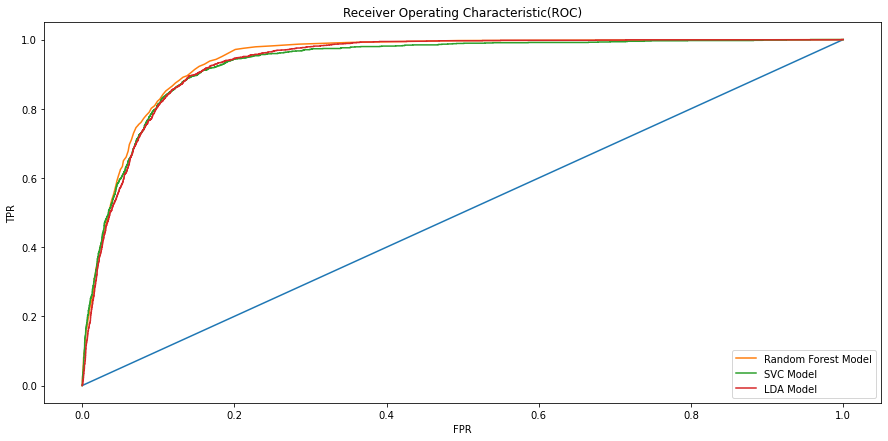

AUC Score Random Forest  :  0.943
AUC Score SVC            :  0.934
AUC Score LDA            :  0.937


In [58]:
plt.figure(figsize = (15,7))
plt.plot([0,1],[0,1])
plt.plot(fpr_forest, tpr_forest, label= 'Random Forest Model')
plt.plot(fpr_svc, tpr_svc, label= 'SVC Model')
plt.plot(fpr_lda, tpr_lda, label= 'LDA Model')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic(ROC)')
plt.show()

print('AUC Score Random Forest  : {: .3f}'.format(auc_forest))
print('AUC Score SVC            : {: .3f}'.format(auc_svc))
print('AUC Score LDA            : {: .3f}'.format(auc_lda))

Keterangan:

* Dari 3 model (Random Forest, SVC dan LDA) dengan akurasi terbaik akan dilihat ROC Curve dan AUC scorenya
* Jika AUC scorenya berada di antara 0.5 dan 1 berarti model tersebut dapat memprediksi antara nilai positif atau negatif (Dalam kasus ini dapat memprediksi Yes or No)

    *Dari AUC score ketiga model di atas, Model **Random Forest** dipilih dengan AUC Scorenya yang paling besar*

## Model Improvement - Model Random Forest (Base Model)

Setelah menjadikan Random Forest sebagai base model. Disini akan dilakukan penentuan parameter-parameter dan valuesnya dalam melakukan hyperparameter tuning.

Hyperparameter tuning yang saya gunakan adalah dengan mengkombinasikan Grid Search dengan Cross Validation.
Parameter dan value acuannya adalah:

    * n_estimators : 50,100,150
    * max_features : auto, sqrt, log2
    * min_sample_leaf: 5,10,15
    * n_jobs : -1 (menggunakan semua source core processor yang ada)
    * random_state: 50

In [59]:
best_score = 0
for n_estimators in [50,100,150]:
    for max_features in ['auto','sqrt','log2']:  
        for min_sample_leaf in [5,10,15]:
            forest_opt = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, n_jobs = -1, random_state = 50)                
            scores = cross_val_score(forest_opt, X_train_scaled,y_train, cv = 5) # Membagi data train menjadi 5 fold
            score = np.mean(scores)
            if score > best_score:
                best_score = score
                best_parameter = {'n_estimators':n_estimators, 'max_features':max_features, 'min_samples_leaf':min_sample_leaf}

print('Best Score: {: .2f}'.format(best_score))
print('Best Parameter: {}'.format(best_parameter))

Best Score:  0.91
Best Parameter: {'n_estimators': 150, 'max_features': 'auto', 'min_samples_leaf': 5}


*Didapatkan parameter-parameter terbaik dengan nilai 'n_estimators': 150, 'max_features': 'auto', 'min_samples_leaf': 5*

**Mendifinisikan model Random Forest Classifier dengan parameter terbaik yang sudah di dapatkan**

In [60]:
forest_opt =RandomForestClassifier(**best_parameter)

**Melakukan train pada model yang sudah di optimisasi**

In [61]:
forest_opt.fit(X_train_scaled,y_train)

RandomForestClassifier(min_samples_leaf=5, n_estimators=150)

**Melakukan prediksi pada data test dengan model yang sudah di optimisasi**

In [62]:
y_pred_forest_opt = forest_opt.predict(X_test_scaled)

**Melakukan prediksi dengan bentuk probability untuk melihat grafik dan score ROC AUC**

In [63]:
y_pred_proba_opt = forest_opt.predict_proba(X_test_scaled)
fpr_opt, tpr_opt, _ = roc_curve(y_test, y_pred_proba_opt[:,1])
auc_opt = roc_auc_score(y_test, y_pred_proba_opt[:,1])

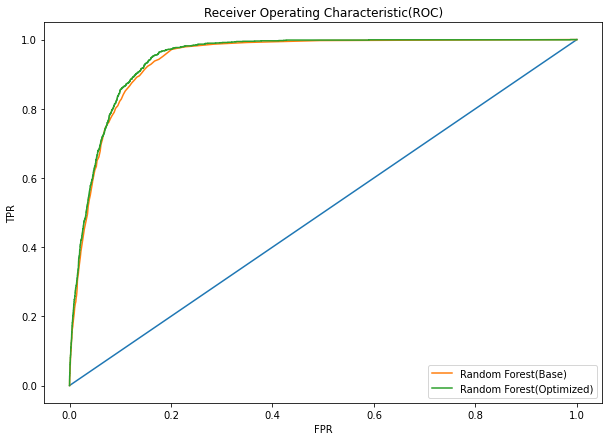

AUC Score Random Forest (Base)       :  0.943
AUC Score Random Forest (Optimized)  :  0.948


In [64]:
plt.figure(figsize = (10,7))
plt.plot([0,1],[0,1])
plt.plot(fpr_forest, tpr_forest, label= 'Random Forest(Base)')
plt.plot(fpr_opt, tpr_opt, label= 'Random Forest(Optimized)',)
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic(ROC)')
plt.show()

print('AUC Score Random Forest (Base)       : {: .3f}'.format(auc_forest))
print('AUC Score Random Forest (Optimized)  : {: .3f}'.format(auc_opt))

Keterangan:

* Gambar di atas menunjukan perbandingan ROC antara model Random Forest (Base) dengan Model Random Forest (Optimized)
* Random Forest (Optimized) mengalami peningkatan AUC Score walaupun tidak terlalu signifikan peningkatannya

## Model Inference

**Melihat 3 data teratas yang acak dan nama-nama kolom**

In [65]:
pd.set_option('display.max_columns', None)
X_test_encode.head(3)

,age,housing,loan,contact,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_encode,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
7403,44,1,0,0,55,1,0,1.1,93.994,-36.4,4.864,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
29282,37,1,0,1,1130,3,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
11552,36,1,0,0,560,3,0,1.4,94.465,-41.8,4.959,5228.1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


**Membuat data dummy yang berisikan dua baris**

In [66]:
dummy = pd.DataFrame(columns = ['age', 'housing', 'loan', 'contact', 'duration', 'campaign', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'pdays_encode', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'])
dummy.loc[0] = [23,0,0,10,0,0,1.1,90,-30,4.5,5000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1]
dummy.loc[1] = [30,1,1,20,1,1,1.4,80,-25,3.3,5500,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1]


**Memprediksi data dummy dengan model random forest yang sudah di optimisasi**

In [67]:
dummy_pred = forest_opt.predict(dummy)

Data dummy berhasil di prediksi dengan model random forest optimisasi

## Analysis

### Model Analysis

Algoritma supervised learning yang di gunakan dalam melakukan prediksi penerimaan tawaran deposito oleh client di suatu bank adalah:

    * Logistic Regression
    * SVC (waktu pemrosesan +- 10 menit)
    * Decision Tree
    * Random Forest
    * KNN
    * Naive Bayes
    * SGD Classifier
    * Linear Discriminant Analysis

Dari semua algoritma diatas. Algoritma terbaik yang digunakan untuk membuat model prediksi dari data ini adalah **Random Forest**. Dengan tingkat AUC Scorenya yang paling besar di antara algoritma-algoritma lain.

Kemudian setelah dilakukan hyperparameter tuning pada model **Random Forest**. Dalam penentuan hyperparameter tuning terbaik di device ini memerlukan waktu kurang lebih sekitar 2 menit. 
Hasil dari tuning atau optimisasi ini menghasilkan AUC Score yang mengalami kenaikan namun tidak signifikan.

    * AUC Score Random Forest (Base)        : 0.942
    * AUC Score Random Forest (Optimized)   : 0.948

Kemudian untuk algoritma alternatif selain penggunaan algoritma Random Forest, dapat menggunakan algoritma **Linear Discriminant Analysis**, dimana AUC Scorenya tertinggi kedua setelah Random Forest


### Overall Analysis

Model ini dapat memprediksi kemungkinan seorang client menerima tawaran deposito dari bank atau tidak. Walaupun data target (variable y yang merupakan variable deposit) imbalance (Jumlah No > Yes), model ini masih tetap bisa melakukan prediksi dengan cukup akurat.

Saran bagi pihak bank jika ingin melakukan penawaran berdasarkan analisis data yang sudah di lakukan sebelumnya:

* Bank dapat menargetkan client dengan tingkat pendidikan universitas
* Client dengan status pernikahan yang sudah manikah dan yang masih melajang dapat menjadi target yang cukup potensial
* Client yang dihubungi melalui telepon seluler, lebih berpotensi menerima tawaran program bank
